# **Introduction**

Customer churn, the loss of customers over time, presents a significant challenge for businesses across industries.

In this analysis, we aim to predict customer churn using historical data and customer attributes.

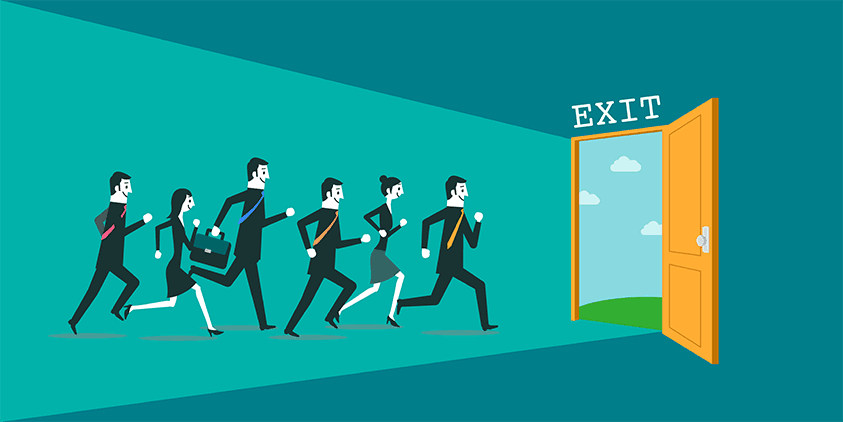

# 1. Loading Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from pathlib import Path
import shutil

raw_file = "/content/drive/MyDrive/churn-dataset.csv"

data_path = Path("data/")

if not data_path.is_dir():
  print("Creating data path!!!")
  data_path.mkdir(exist_ok=True, parents=True)

  shutil.copy(raw_file, data_path)


# 2. EDA (Exploratory Data Analysis EDA) and Manipulation



In [3]:
import pandas as pd

pd.set_option('display.max_rows', None, 'display.max_columns', None)
df = pd.read_csv("/content/drive/MyDrive/churn-dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.shape

(7043, 21)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Since customer id is unique value we dont need this column
df.drop(["customerID"], axis=1, inplace=True)

In [12]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [13]:
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [14]:
df.Partner.value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [15]:
df.Dependents.value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [16]:
df.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
64     80
56     80
52     80
26     79
25     79
61     76
14     76
65     76
60     76
46     74
19     73
29     72
27     72
30     72
63     72
20     71
53     70
62     70
41     70
32     69
50     68
47     68
51     68
54     68
58     67
49     66
57     65
31     65
43     65
37     65
42     65
34     65
33     64
55     64
48     64
40     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: count, dtype: int64

In [17]:
df.PhoneService.value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [18]:
df.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [19]:
df.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [20]:
df.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [21]:
df.OnlineBackup.value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [22]:
df.DeviceProtection.value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [23]:
df.TechSupport.value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [24]:
df.StreamingTV.value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [25]:
df.StreamingMovies.value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [26]:
df.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [27]:
df.PaperlessBilling.value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [28]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [29]:
# df.MonthlyCharges.value_counts()

In [30]:
# df.TotalCharges.value_counts()

In [31]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [32]:
df.Churn = df.Churn.replace({"Yes": 1, "No": 0})

In [33]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [34]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

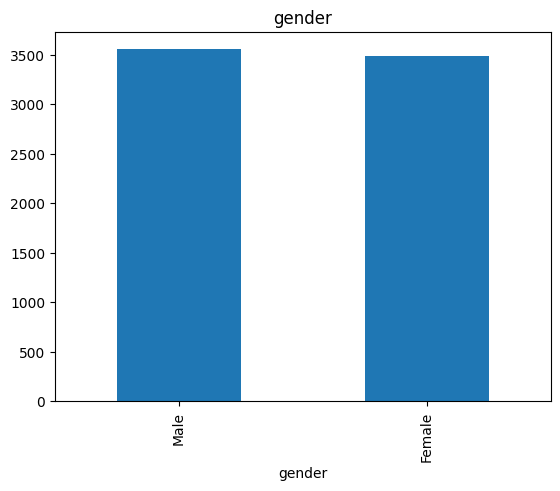

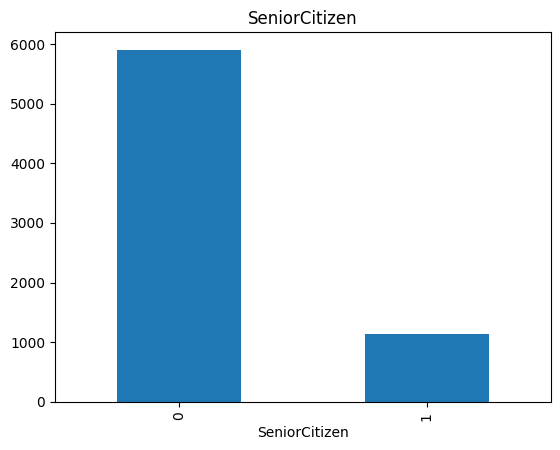

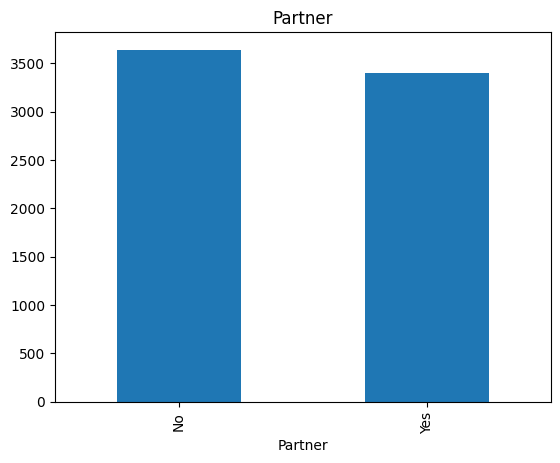

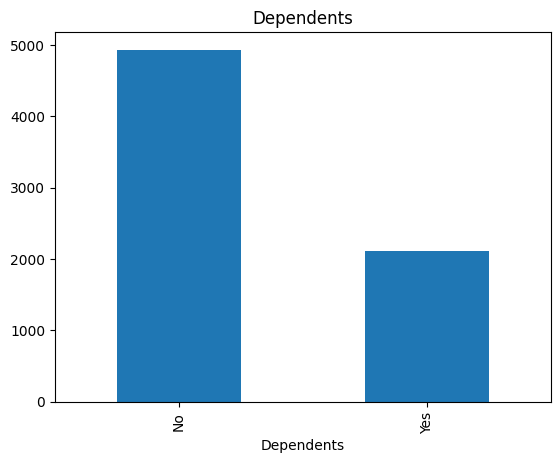

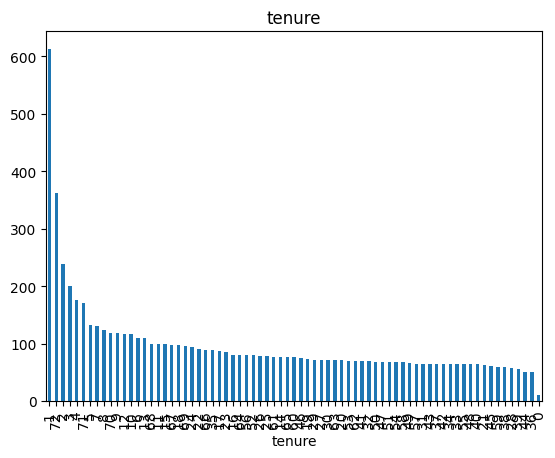

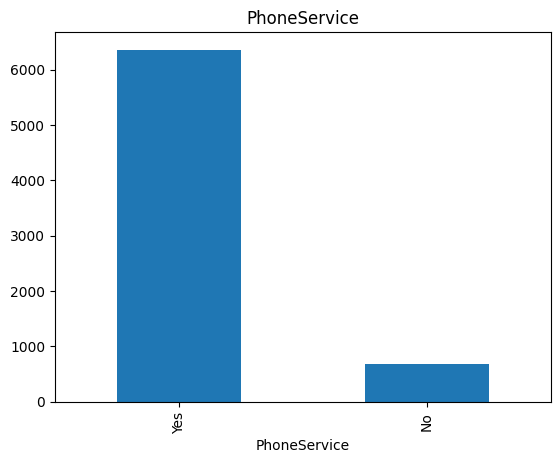

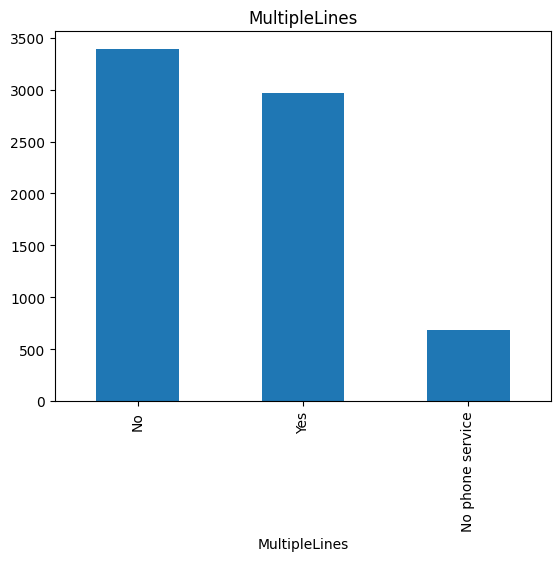

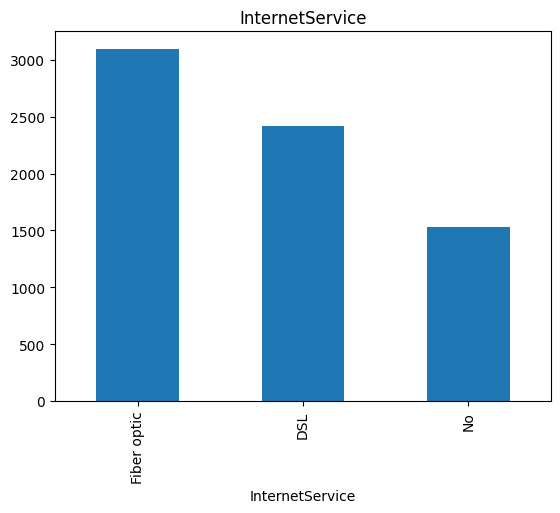

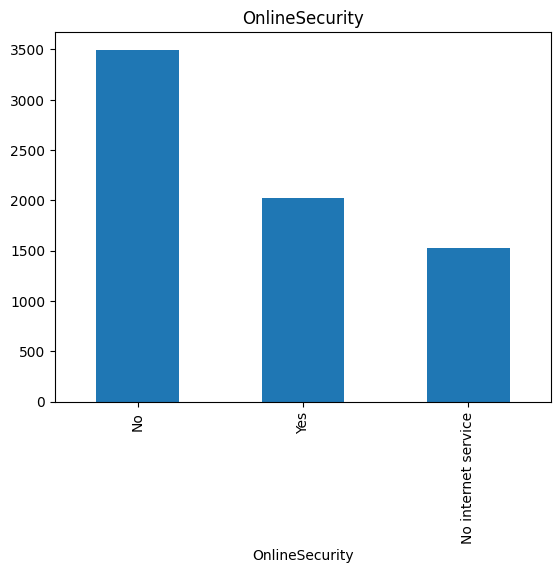

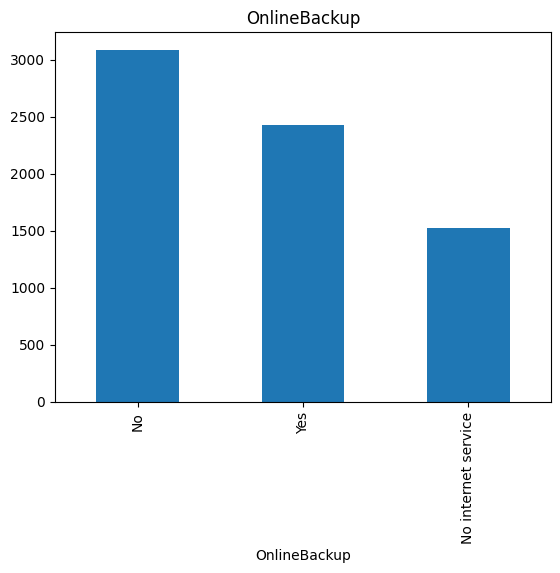

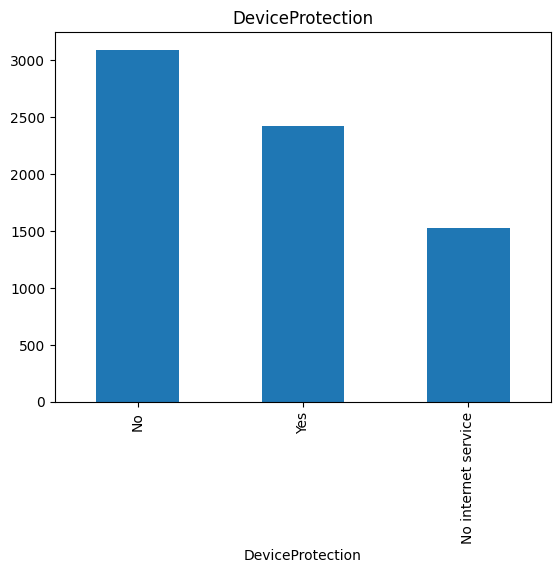

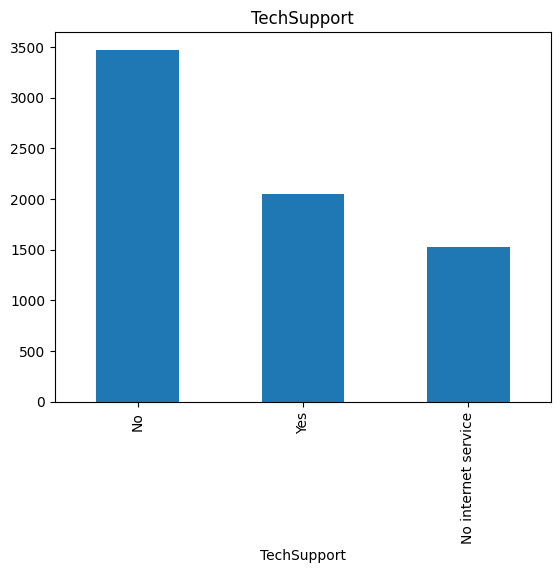

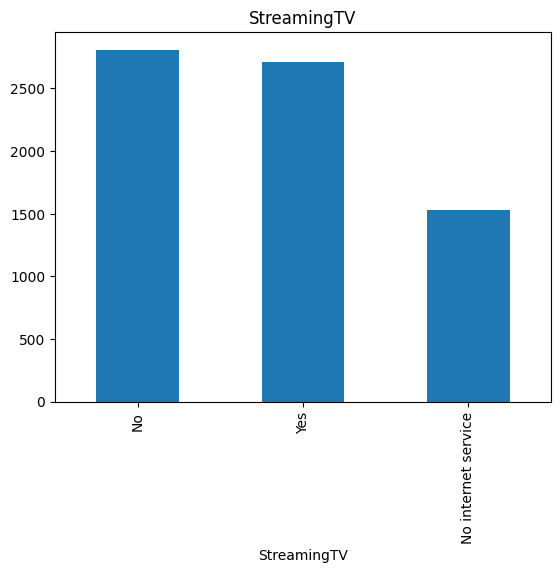

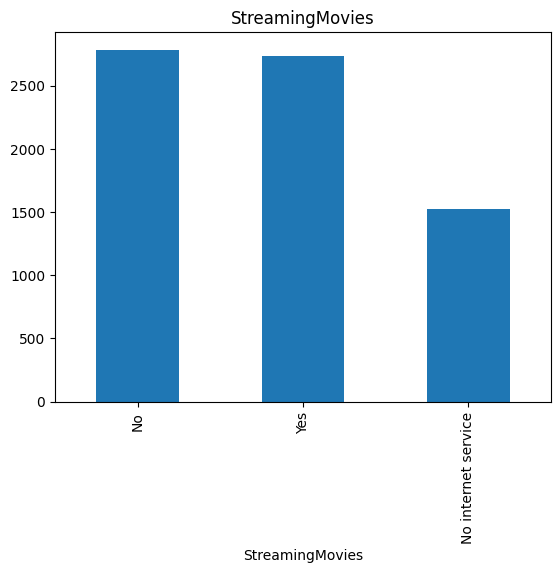

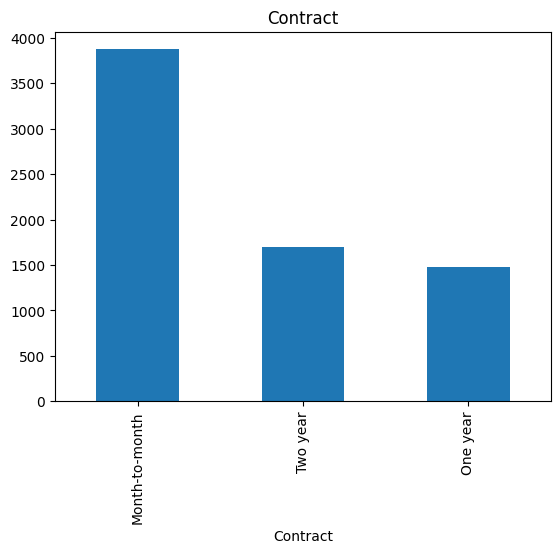

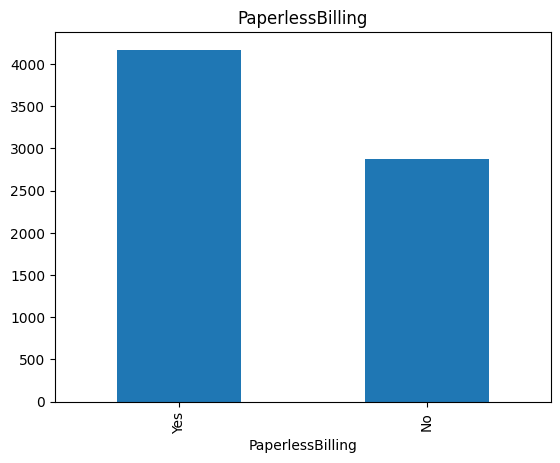

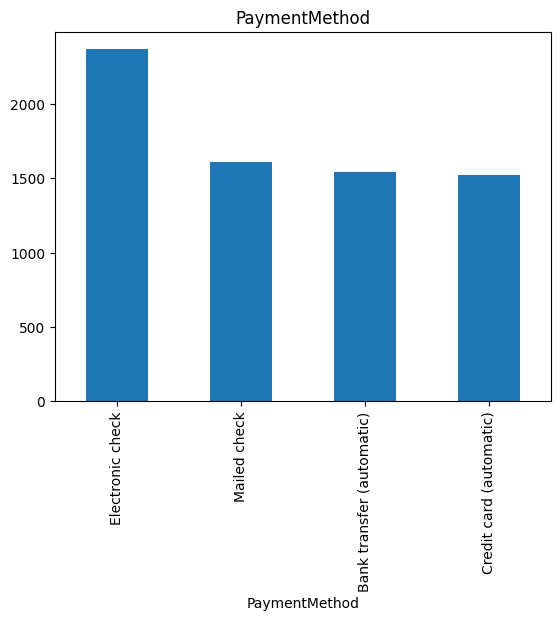

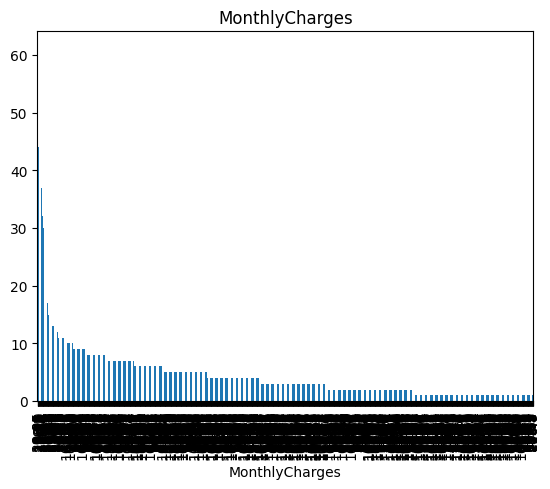

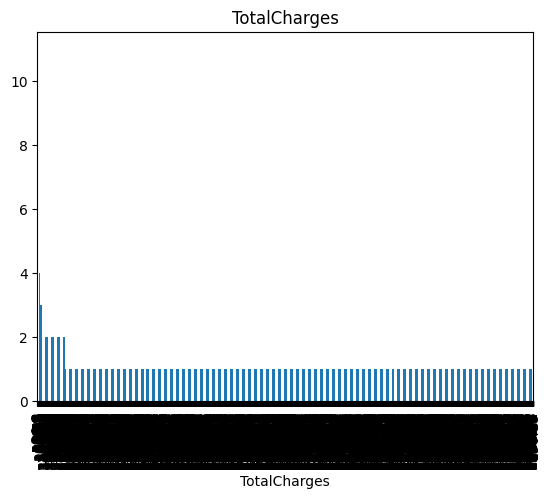

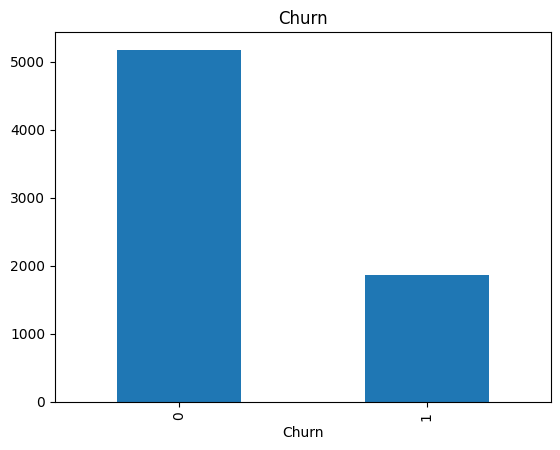

In [35]:
import matplotlib.pyplot as plt

for column in df.columns:
  df[column].value_counts().plot(kind='bar', title=column)
  plt.show();

In [36]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

# 3. Preparing the Dataset for Machine Learning Training

  After Initial Exploratory Data Analysis (EDA), we'll proceed to prepare our dataset for training by splitting the data and converting categorical variables into a numeric format.

In [37]:
# Splitting dataset into features and targets
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [38]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [39]:
y. head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [40]:
X.shape, y.shape

((7043, 19), (7043,))

In [41]:
df.TotalCharges.isnull().sum()

0

In [42]:
import pandas as pd

# Convert 'TotalCharges' column to numeric, coercing errors to NaN
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

# Check the data types again
print(X['TotalCharges'].dtype)


float64


In [43]:
X.TotalCharges.isnull().sum()

11

In [44]:
X.TotalCharges = X.TotalCharges.fillna(X.TotalCharges.mean())

In [45]:
X.TotalCharges.isnull().sum()

0

In [46]:
# Converting Categorical Data into Numerical Format
categorical_columns = []

for column, content in X.items():
  if not pd.api.types.is_numeric_dtype(content):
    categorical_columns.append(column)

print(categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [47]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical features
categorical_features = categorical_columns

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Instantiate ColumnTransformer
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                                 remainder='passthrough')

# Fit and transform the data
transformed_data = transformer.fit_transform(X)

In [48]:
transformed_data, transformed_data.shape

(array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.9850e+01,
         2.9850e+01],
        [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.4000e+01, 5.6950e+01,
         1.8895e+03],
        [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.0000e+00, 5.3850e+01,
         1.0815e+02],
        ...,
        [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.1000e+01, 2.9600e+01,
         3.4645e+02],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.0000e+00, 7.4400e+01,
         3.0660e+02],
        [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 6.6000e+01, 1.0565e+02,
         6.8445e+03]]),
 (7043, 45))

In [49]:
import pandas as pd

# Get the column names after one-hot encoding
encoded_columns = transformer.named_transformers_['one_hot'] \
                             .get_feature_names_out(categorical_features)

# Create a DataFrame with the transformed data and column names
transformed_df = pd.DataFrame(transformed_data, columns=list(encoded_columns) + list(X.columns[len(categorical_features):]))

# Check the contents of the transformed DataFrame
transformed_df.isnull().sum()


gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProt

# 4. Machine Learning: Training and Evaluation

  This section can encompass all aspects related to machine learning, including model selection, training, hyperparameter tuning, and evaluation. It will cover everything from choosing the appropriate algorithm to fine-tuning its parameters and assessing its performance on the dataset.

**Note:-** Seperating the dataset into training and test sets allows training on the training data and evaluating model performance on the test dataset. Given the small size of our dataset, using a train-test split suffices to assess model performance effectively. This approach guards against overfitting and bias in machine learning models.

In [50]:
# Splitting our datasets into training and test set using machine learning
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y,
                                                    test_size=0.3,
                                                    random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(4930, 4930, 2113, 2113)

In [51]:
y_train.value_counts(), y_test.value_counts()

(Churn
 0    3635
 1    1295
 Name: count, dtype: int64,
 Churn
 0    1539
 1     574
 Name: count, dtype: int64)

## 4.1 Model Selection: Finding the Perfect Fit

**Note:-** Trying a few models with our limited dataset is a pragmatic approach, considering the computational expense and time consumption associated with exhaustive testing and hyperparameter tuning. While perfection may be elusive, the iterative process allows for ongoing model refinement and adaptation, fostering continuous improvement and growth in our machine learning endeavors.

In [52]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [53]:
models = {"LinearSVC": LinearSVC(),
          "GaussianNB": GaussianNB(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "SVC": SVC(),
          "RandomFOrestClassifier": RandomForestClassifier()}

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict probabilities
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)


        # Store results
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': cm,
        }

    return results


In [68]:
results = evaluate_models(models=models,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
results

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'LinearSVC': {'accuracy': 0.8002839564600095,
  'precision': 0.6743119266055045,
  'recall': 0.5121951219512195,
  'f1_score': 0.582178217821782,
  'confusion_matrix': array([[1397,  142],
         [ 280,  294]])},
 'GaussianNB': {'accuracy': 0.7008991954566967,
  'precision': 0.47243346007604564,
  'recall': 0.8658536585365854,
  'f1_score': 0.6113161131611315,
  'confusion_matrix': array([[984, 555],
         [ 77, 497]])},
 'KNeighborsClassifier': {'accuracy': 0.7709417889256981,
  'precision': 0.6027397260273972,
  'recall': 0.45993031358885017,
  'f1_score': 0.5217391304347826,
  'confusion_matrix': array([[1365,  174],
         [ 310,  264]])},
 'SVC': {'accuracy': 0.7283483199242783,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0,
  'confusion_matrix': array([[1539,    0],
         [ 574,    0]])},
 'RandomFOrestClassifier': {'accuracy': 0.7946048272598202,
  'precision': 0.6707317073170732,
  'recall': 0.47909407665505227,
  'f1_score': 0.5589430894308943,
  'confusion

In [80]:
import matplotlib.pyplot as plt

def plot_evaluation_metrics(results):
    model_names = list(results.keys())

    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 24))

    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    colors = ['skyblue', 'salmon', 'lightgreen', 'orchid']
    titles = ['Accuracy of Different Models', 'Precision of Different Models',
              'Recall of Different Models', 'F1 Score of Different Models']

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        values = [results[model][metric] for model in model_names]
        ax.bar(model_names, values, color=colors[idx])
        ax.set_xlabel('Models')
        ax.set_ylabel(metric.capitalize())
        ax.set_title(titles[idx])
        ax.set_xticklabels(model_names, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


<ipython-input-80-54ecfece0ec9>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names, rotation=45, ha='right')


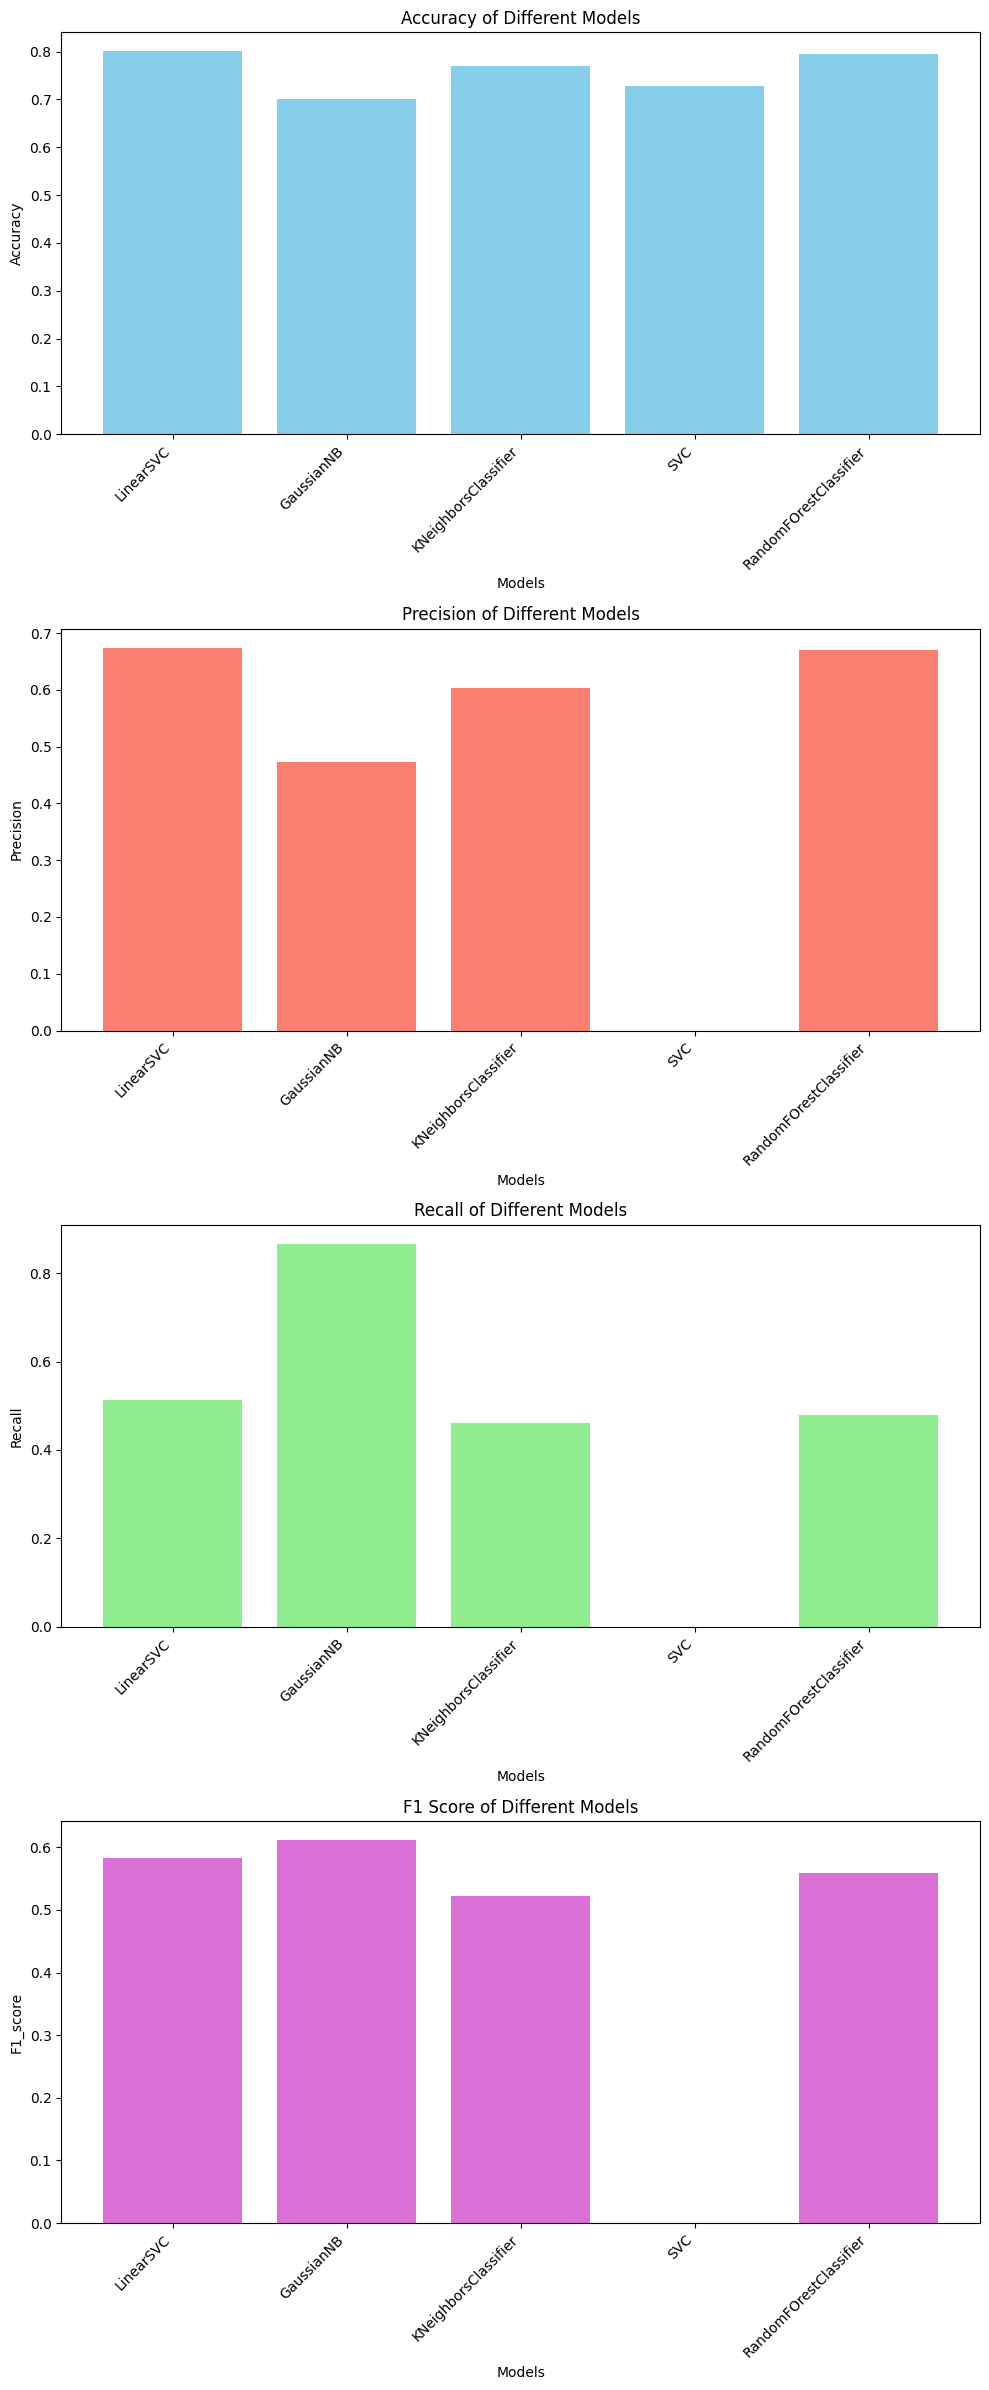

In [81]:
plot_evaluation_metrics(results);

## 4.2 Hyperparameter Tuning with RandomizedSearchCV: Finding the Optimal Settings

**Note:-** Due to the poor performance observed in the Support Vector Classifier (SVC) during initial evaluation, I've decided not to include it in our hyperparameter tuning process.

In [83]:
from sklearn.model_selection import RandomizedSearchCV


# Define hyperparameter grids for each model
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


lsvc_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge']
}


In [89]:
# Define RandomizedSearchCV for each model
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_grid,
                                      n_iter=10, cv=5, random_state=42, n_jobs=-1)

lsvc_random_search = RandomizedSearchCV(LinearSVC(), lsvc_param_grid, n_iter=10,
                                        cv=5, random_state=42, n_jobs=-1)

knn_random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_param_grid,
                                       n_iter=10, cv=5, random_state=42, n_jobs=-1)




# Fit RandomizedSearchCV for each model
rf_random_search.fit(X_train, y_train)
lsvc_random_search.fit(X_train, y_train)
knn_random_search.fit(X_train, y_train)



# Access best parameters and best estimator for each model
best_params_rf = rf_random_search.best_params_
best_estimator_rf = rf_random_search.best_estimator_

best_params_lsvc = lsvc_random_search.best_params_
best_estimator_lsvc = lsvc_random_search.best_estimator_

best_params_knn = knn_random_search.best_params_
best_estimator_knn = knn_random_search.best_estimator_

# Evaluate performance of best estimator on test data
rf_test_score = best_estimator_rf.score(X_test, y_test)
lsvc_test_score = best_estimator_lsvc.score(X_test, y_test)
knn_test_score = best_estimator_knn.score(X_test, y_test)

rf_test_score, lsvc_test_score, knn_test_score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

(0.8021769995267393, 0.7813535257927118, 0.7870326549929011)

In [91]:
model_ht = {"RandomForestClassifier": rf_random_search,
            "Linearsvc": lsvc_random_search,
            "KNeighborsclassifier": knn_random_search}

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_models(models, X_train, y_train, X_test, y_test):
    train_results = {}
    test_results = {}

    for name, model in models.items():
        # Predictions for train and test data
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Compute evaluation metrics for train data
        accuracy_train = accuracy_score(y_train, y_pred_train)
        precision_train = precision_score(y_train, y_pred_train)
        recall_train = recall_score(y_train, y_pred_train)
        f1_train = f1_score(y_train, y_pred_train)
        cm_train = confusion_matrix(y_train, y_pred_train)

        # Compute evaluation metrics for test data
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        f1_test = f1_score(y_test, y_pred_test)
        cm_test = confusion_matrix(y_test, y_pred_test)

        # Store results for train and test
        train_results[name] = {
            'accuracy': accuracy_train,
            'precision': precision_train,
            'recall': recall_train,
            'f1_score': f1_train,
            'confusion_matrix': cm_train,
        }

        test_results[name] = {
            'accuracy': accuracy_test,
            'precision': precision_test,
            'recall': recall_test,
            'f1_score': f1_test,
            'confusion_matrix': cm_test,
        }

    return train_results, test_results


In [93]:
train_results, test_results = evaluate_models(models=model_ht, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [94]:
train_results

{'RandomForestClassifier': {'accuracy': 0.8417849898580122,
  'precision': 0.7614213197969543,
  'recall': 0.5791505791505791,
  'f1_score': 0.6578947368421052,
  'confusion_matrix': array([[3400,  235],
         [ 545,  750]])},
 'Linearsvc': {'accuracy': 0.783975659229209,
  'precision': 0.5953565505804311,
  'recall': 0.5544401544401545,
  'f1_score': 0.574170331867253,
  'confusion_matrix': array([[3147,  488],
         [ 577,  718]])},
 'KNeighborsclassifier': {'accuracy': 0.8050709939148073,
  'precision': 0.7313019390581718,
  'recall': 0.40772200772200773,
  'f1_score': 0.5235498264749628,
  'confusion_matrix': array([[3441,  194],
         [ 767,  528]])}}

In [97]:
test_results

{'RandomForestClassifier': {'accuracy': 0.8021769995267393,
  'precision': 0.6875,
  'recall': 0.49825783972125437,
  'f1_score': 0.5777777777777777,
  'confusion_matrix': array([[1409,  130],
         [ 288,  286]])},
 'Linearsvc': {'accuracy': 0.7813535257927118,
  'precision': 0.6029411764705882,
  'recall': 0.5714285714285714,
  'f1_score': 0.5867620751341681,
  'confusion_matrix': array([[1323,  216],
         [ 246,  328]])},
 'KNeighborsclassifier': {'accuracy': 0.7870326549929011,
  'precision': 0.691358024691358,
  'recall': 0.3902439024390244,
  'f1_score': 0.4988864142538976,
  'confusion_matrix': array([[1439,  100],
         [ 350,  224]])}}

<ipython-input-80-54ecfece0ec9>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names, rotation=45, ha='right')


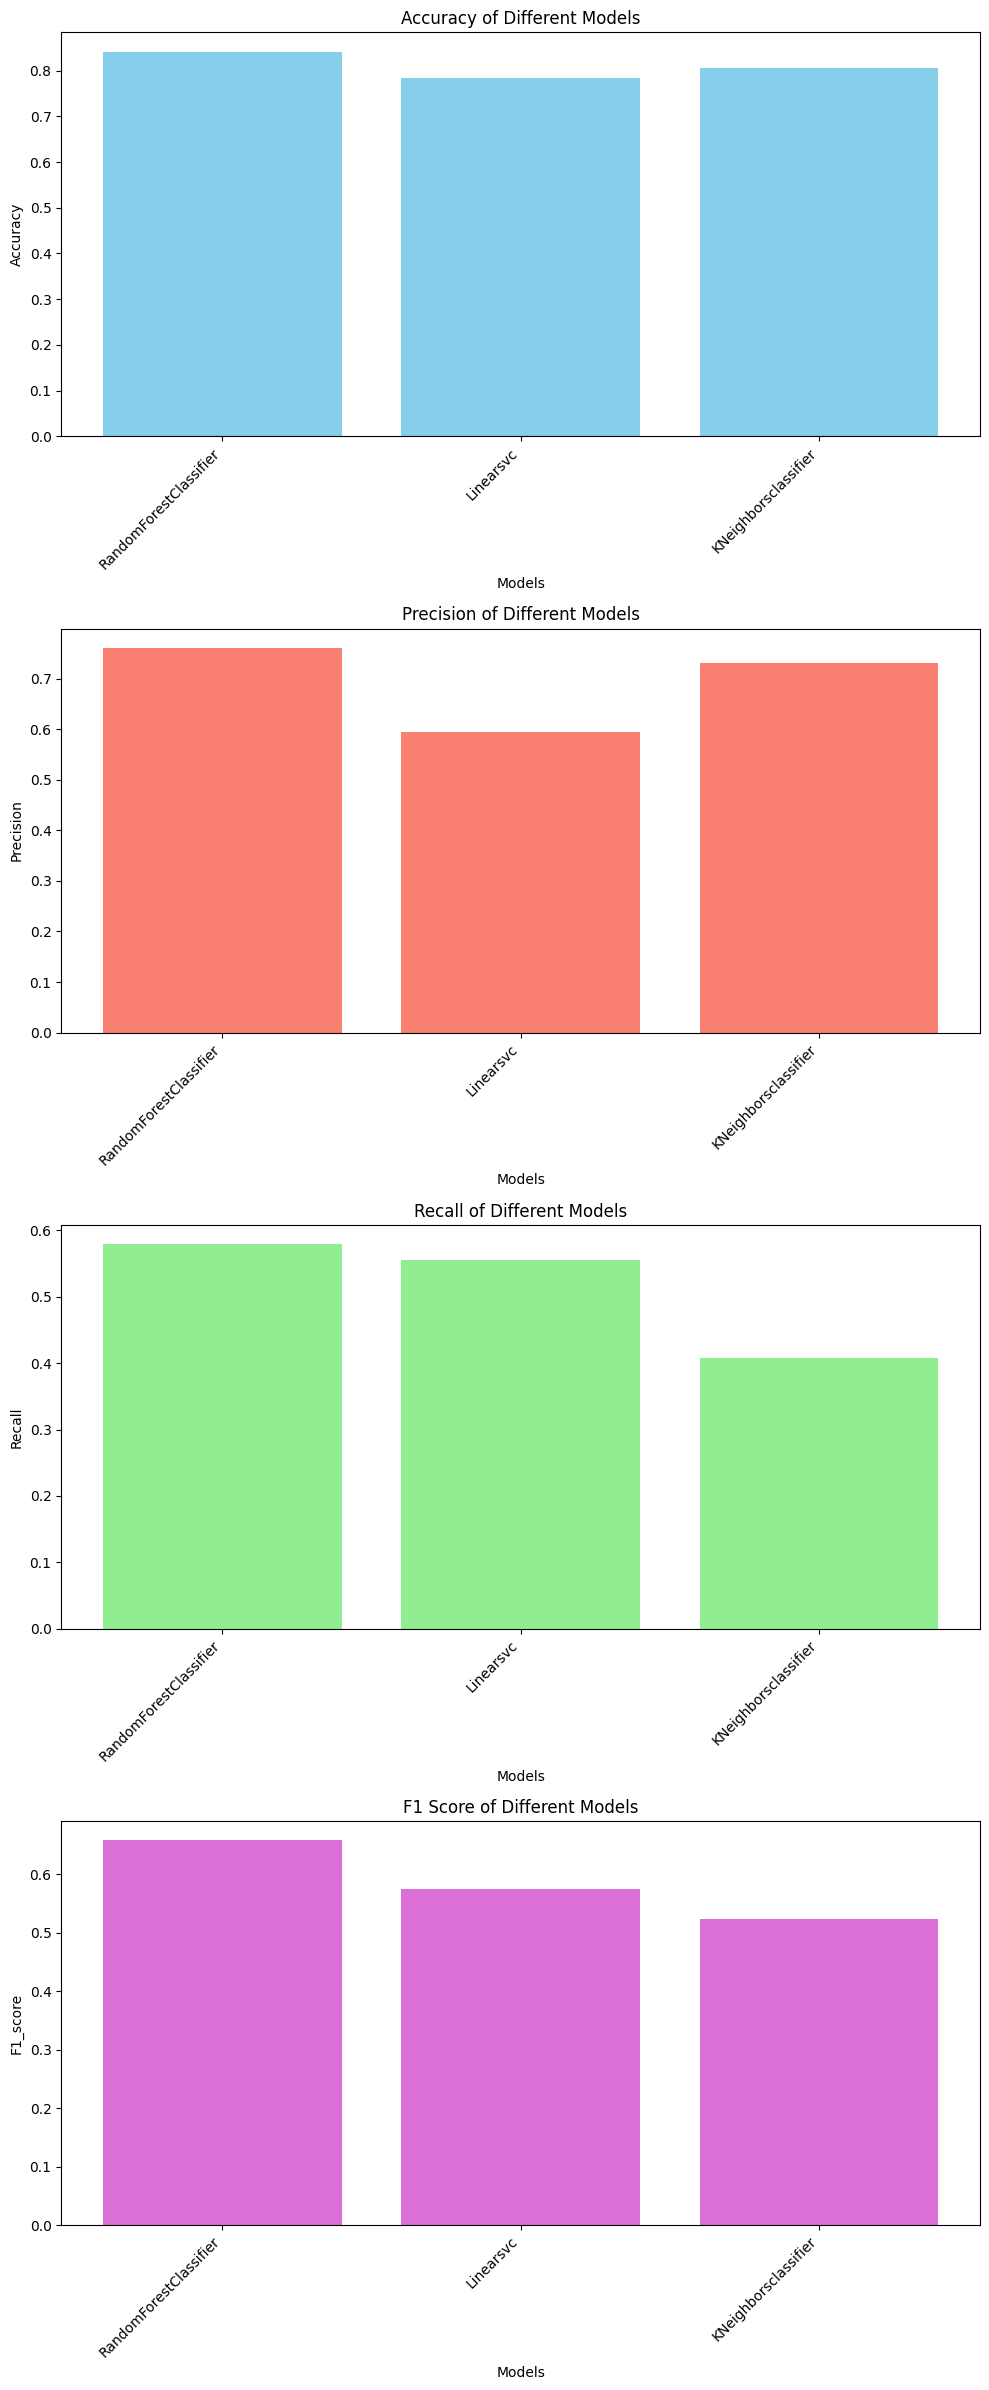

In [96]:
# Plotting evaluation metrics for training data
plot_evaluation_metrics(train_results)

<ipython-input-80-54ecfece0ec9>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names, rotation=45, ha='right')


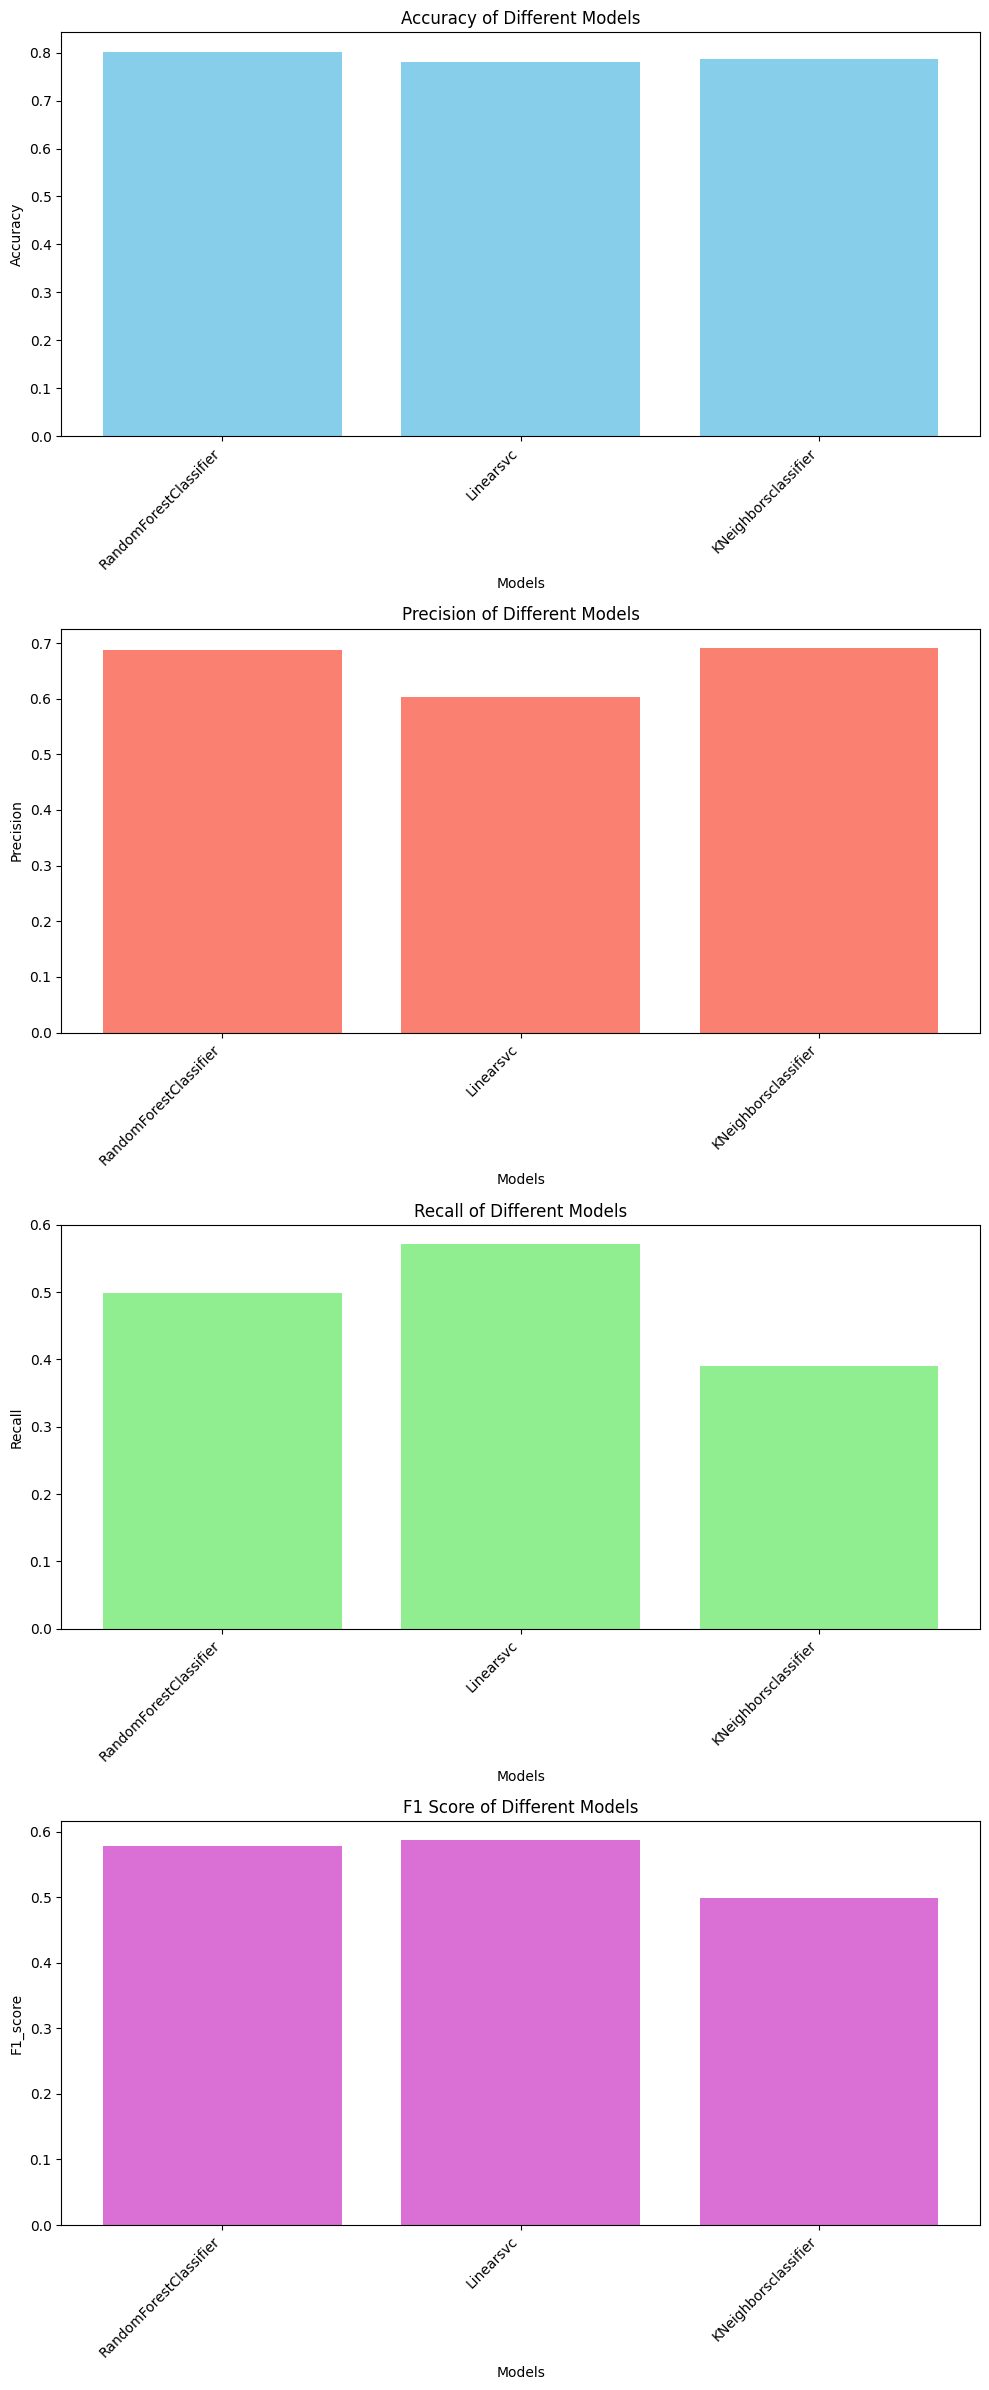

In [99]:
# Plotting evaluatin metrics for test data
plot_evaluation_metrics(test_results)

# 5. Saving the Trained Model for Deployment

In [100]:
import joblib

joblib.dump(rf_random_search, "random_forest_model.pkl")

['random_forest_model.pkl']